In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
data = pd.read_csv("C:/Users/Administrator/Desktop/abalone.data",
                  names=["sex","length","diameter","height",
                         "whole weight","shucked weight",
                         "viscera weight","shell weight",
                         "rings"])
                         
#Get features
y = data['rings']
X = data[["sex","length","height",
          "shucked weight","viscera weight","shell weight"]]

In [3]:
#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
y.shape

(4177,)

In [5]:
X.shape

(4177, 8)

In [6]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)
y_pred = model.predict(X)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 均方误差（Mean Squared Error）
mse = mean_squared_error(y, y_pred)

# 均方根误差（Root Mean Squared Error）
rmse = mean_squared_error(y, y_pred, squared=False)

# 平均绝对误差（Mean Absolute Error）
mae = mean_absolute_error(y, y_pred)

# 计算R平方
r2 = r2_score(y, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R-squared: 0.9129849824514464
Mean Squared Error: 0.904327695263418
Root Mean Squared Error: 0.9509614583480331
Mean Absolute Error: 0.6874746801409677


In [8]:
#Get shap values



explainer = shap.Explainer(model)
shap_values = explainer(X)

#### Plot 1: Waterfall  (针对特定样本)

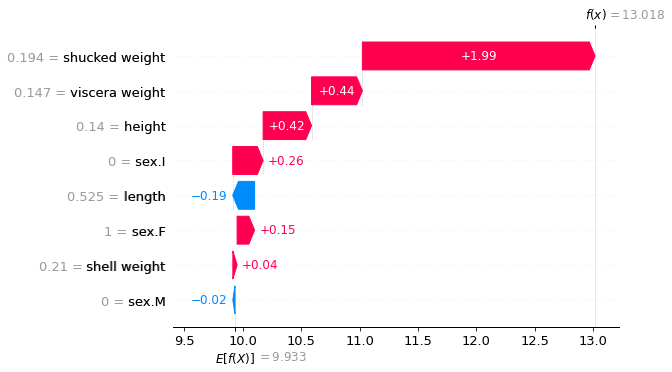

In [10]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[10])

#### Plot 2: Force Plot (单个样本)

In [11]:
# Forceplot for first observation
shap.plots.force(shap_values[0])

#### Plot 3: Stacked force plot

In [12]:
shap.plots.force(shap_values[0:200])

#### Plot 4: Mean SHAP

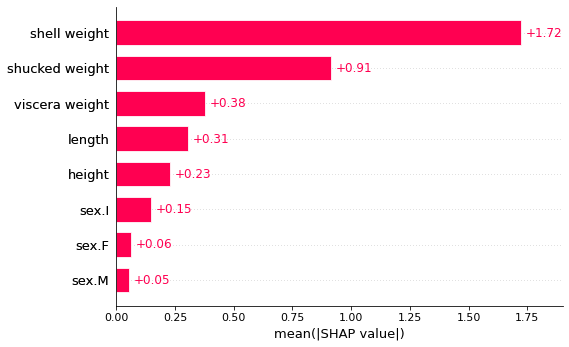

In [13]:
#Mean SHAP
shap.plots.bar(shap_values)

#### Plot 5: Beeswarm

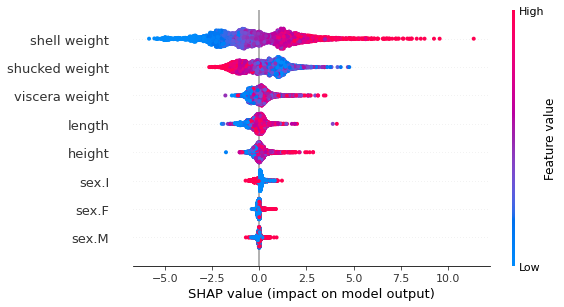

In [14]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

#### Plot 6: Dependence plots  ( They are particularly useful if the feature has a non-linear relationship with the target variable.)

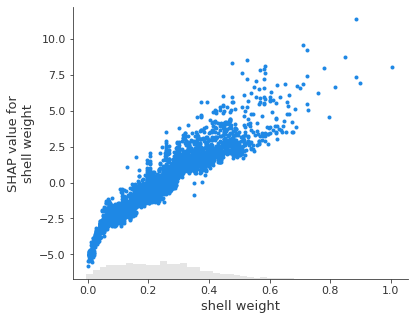

In [15]:
#Plot 1: shell weight
shap.plots.scatter(shap_values[:,"shell weight"])

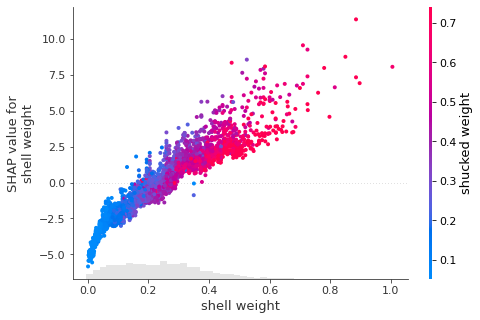

In [16]:
shap.plots.scatter(shap_values[:,"shell weight"],
                   color=shap_values[:,"shucked weight"])

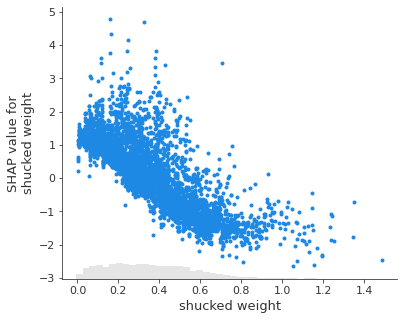

In [17]:
#Plot 2: shucked weight
shap.plots.scatter(shap_values[:,"shucked weight"])